In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid"); 
plt.rcParams['figure.dpi'] = 360
from wordcloud import WordCloud 
import spacy  
from spacy.lang.en import English  
nlp = English()  
from collections import Counter 
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
!pip install nltk
import zipfile
import shutil
from glob import glob
import os
from sklearn.model_selection import train_test_split
import sys
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import time
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup as soup
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
!pip install num2words
import num2words
from nltk import ne_chunk

     |████████████████████████████████| 81kB 1.9MB/s 
     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 604kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 13.7MB/s 
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 296kB 34.8MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=655b4d13d367cddd2aa0f7636a7048222957debb15fd1c6f27f2db50ee8e0972
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=98dd17edfe24f3159e6dedc52dcfd514283379d2f35a80ccb9a9164fd83fc533
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imageh

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 102kB 2.0MB/s 


In [ ]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
!unzip /content/MeyersBriggsML.zip

Archive:  /content/MeyersBriggsML.zip
  inflating: mbti_1.csv              


In [ ]:
MB = pd.read_csv('/content/mbti_1.csv')
MB.head(3)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...


In [ ]:
[p.split('|||') for p in MB.head(2).posts.values]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


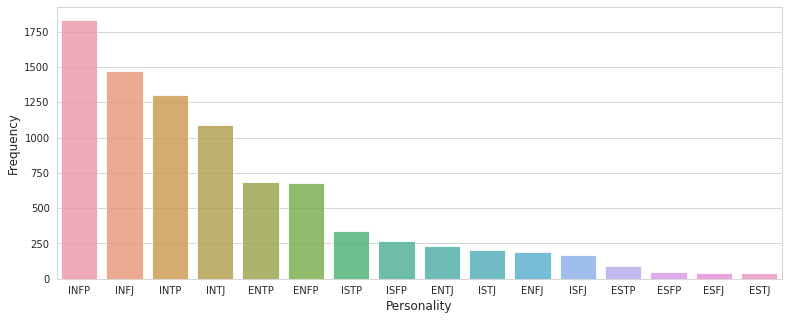

In [ ]:
view_type = MB['type'].value_counts()

plt.figure(figsize=(13,5))
sns.barplot(view_type.index, view_type.values, alpha=0.8)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Personality', fontsize=12)
plt.show()

In [ ]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E incorrect')
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S incorrect')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F incorrect')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

MB = MB.join(MB.apply (lambda row: get_types (row),axis=1))
MB.head(5)

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,0,1,1,1


In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", MB['IE'].value_counts()[0], " / ", MB['IE'].value_counts()[1])
print ("Intuition (N) – Sensing (S):\t\t", MB['NS'].value_counts()[0], " / ", MB['NS'].value_counts()[1])
print ("Thinking (T) – Feeling (F):\t\t", MB['TF'].value_counts()[0], " / ", MB['TF'].value_counts()[1])
print ("Judging (J) – Perceiving (P):\t\t", MB['JP'].value_counts()[0], " / ", MB['JP'].value_counts()[1])

Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) – Sensing (S):		 1197  /  7478
Thinking (T) – Feeling (F):		 4694  /  3981
Judging (J) – Perceiving (P):		 5241  /  3434


In [ ]:
Letter = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
Pairs = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [Letter[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality
    
    s = ""
    for i, l in enumerate(personality):
        s += Pairs[i][l]
    return s

# Check ...
M = MB.head(4)
list_personality_bin = np.array([translate_personality(p) for p in M.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [ ]:
#The code below does not appear to have worked 

In [ ]:
MB['posts'] = [soup(text).get_text() for text in MB['posts']]

In [ ]:
MB['posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

In [ ]:
types = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
types = [x.lower() for x in types]

In [ ]:
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

cachedStopWords = stopwords.words("english")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def pre_process_data(MB, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(MB)
    i=0
    
        
    for row in MB.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in types:
                temp = temp.replace(t,"")

        type_labelized = translate_personality(row[1].type)
        list_personality.append(type_labelized)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [ ]:
list_posts, list_personality = pre_process_data(MB, remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [ ]:
list_posts[0]

'   moment sportscenter top ten play prank life changing experience life repeat today may perc experience immerse last thing  friend posted facebook committing suicide next day rest peace hello  sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth welcome stuff game set match prozac wellbrutin least thirty minute moving leg mean moving sitting desk chair weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want would likely use given type cognitive function whatnot left thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim dear  favorite video game growing current favorite video game cool appears late sad someone everyone wait thought confidence good thing cherish time solitude b c revel within inner world whereas time workin enjoy time worry people always around yo  lady complimentary personality well h

In [ ]:
list_personality[0]

array([0, 0, 0, 0])

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
type(list_posts)

numpy.ndarray

In [ ]:
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
CV = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1) 

In [ ]:
print("CountVectorizer...")
X_CV = CV.fit_transform(list_posts)

CountVectorizer...


In [ ]:
TF = TfidfTransformer()
print("Tf-idf...")
X_TF =  TF.fit_transform(X_CV).toarray()

Tf-idf...


In [ ]:
words = list(enumerate(CV.get_feature_names()))
words

[(0, 'ability'),
 (1, 'able'),
 (2, 'absolutely'),
 (3, 'accept'),
 (4, 'accurate'),
 (5, 'across'),
 (6, 'act'),
 (7, 'action'),
 (8, 'actual'),
 (9, 'actually'),
 (10, 'add'),
 (11, 'admit'),
 (12, 'advice'),
 (13, 'afraid'),
 (14, 'age'),
 (15, 'ago'),
 (16, 'agree'),
 (17, 'ah'),
 (18, 'almost'),
 (19, 'alone'),
 (20, 'along'),
 (21, 'already'),
 (22, 'although'),
 (23, 'amazing'),
 (24, 'amount'),
 (25, 'angry'),
 (26, 'animal'),
 (27, 'annoying'),
 (28, 'another'),
 (29, 'answer'),
 (30, 'anxiety'),
 (31, 'anymore'),
 (32, 'anyone'),
 (33, 'anything'),
 (34, 'anyway'),
 (35, 'apparently'),
 (36, 'appreciate'),
 (37, 'approach'),
 (38, 'area'),
 (39, 'argument'),
 (40, 'around'),
 (41, 'art'),
 (42, 'ask'),
 (43, 'asked'),
 (44, 'asking'),
 (45, 'aspect'),
 (46, 'assume'),
 (47, 'attention'),
 (48, 'attracted'),
 (49, 'avatar'),
 (50, 'avoid'),
 (51, 'aware'),
 (52, 'away'),
 (53, 'awesome'),
 (54, 'awkward'),
 (55, 'back'),
 (56, 'bad'),
 (57, 'based'),
 (58, 'basically'),
 (59, 

In [ ]:
X_TF.shape

(8675, 779)

In [ ]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_TF[0])

X: Posts in tf-idf representation 
* 1st row:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.08066234 0.06835878 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.10318938 0.         0.04997299 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08633404 0.
 0.         0.10514588 0.         0.         0.         0.
 0.         0.05216476 0.06843631 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.       

In [ ]:
type_pairs = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(type_pairs)):
    print(type_pairs[l])

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [ ]:
#print("MBTI 1st row: %s" % translate_back(list_personality[0]))
#print("Y: Binarized MBTI 1st row: %s" % list_personality[0])

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = X_TF

In [ ]:
list_personality

array([[0, 0, 0, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       ...,
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [ ]:
for l in range(len(type_pairs)):
    print("%s ..." % (type_pairs[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_pairs[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 78.66%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 86.03%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 72.23%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 66.12%


In [ ]:
for l in range(len(type_pairs)):
    print("%s ..." % (type_pairs[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier()
    eval_set = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_pairs[l], accuracy * 100.0))
    

IE: Introversion (I) / Extroversion (E) ...
[0]	validation_0-logloss:0.66318
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.638035
[2]	validation_0-logloss:0.617298
[3]	validation_0-logloss:0.600237
[4]	validation_0-logloss:0.586077
[5]	validation_0-logloss:0.57407
[6]	validation_0-logloss:0.564219
[7]	validation_0-logloss:0.556033
[8]	validation_0-logloss:0.548668
[9]	validation_0-logloss:0.542554
[10]	validation_0-logloss:0.537249
[11]	validation_0-logloss:0.532953
[12]	validation_0-logloss:0.529022
[13]	validation_0-logloss:0.525587
[14]	validation_0-logloss:0.522417
[15]	validation_0-logloss:0.520099
[16]	validation_0-logloss:0.518165
[17]	validation_0-logloss:0.516207
[18]	validation_0-logloss:0.514738
[19]	validation_0-logloss:0.512806
[20]	validation_0-logloss:0.511295
[21]	validation_0-logloss:0.510344
[22]	validation_0-logloss:0.508716
[23]	validation_0-logloss:0.507551
[24]	validation_0-logloss:0.506879
[25]	validation_0-logloss

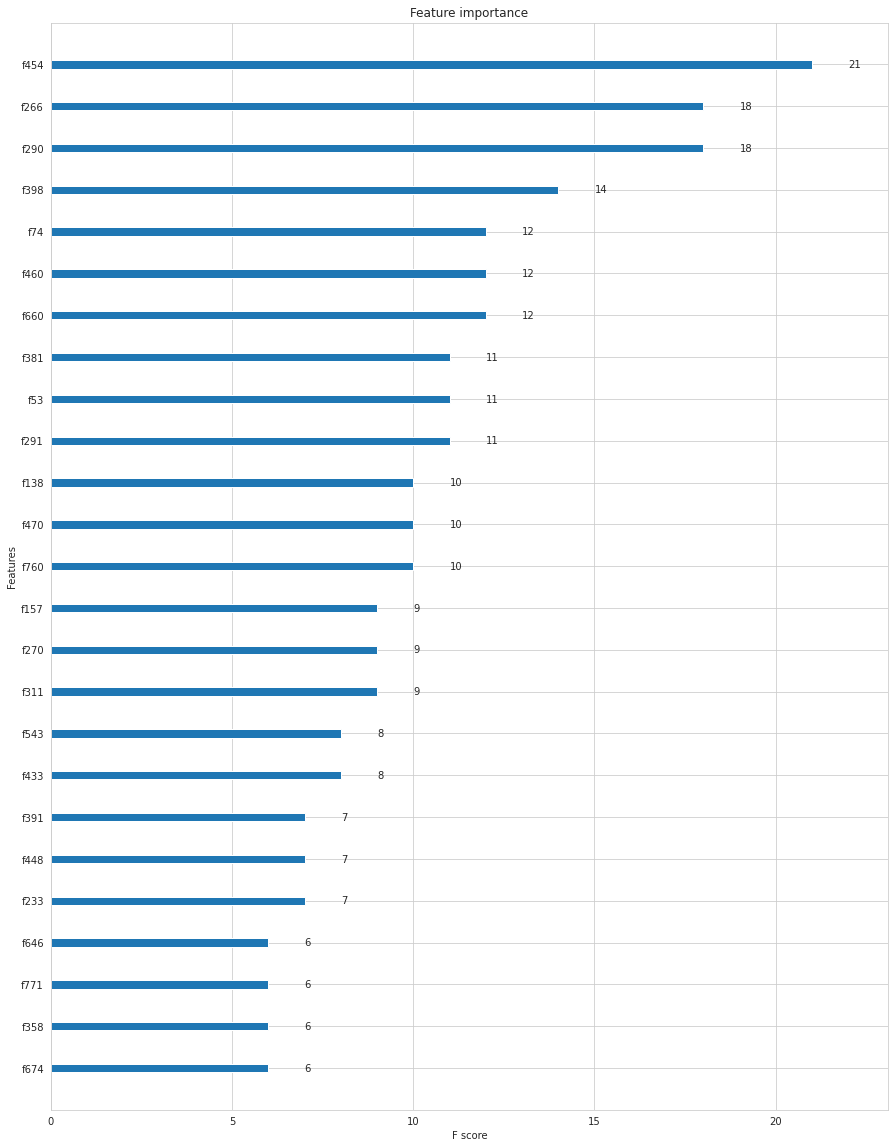

In [ ]:
from xgboost import plot_importance

y = list_personality[:,0]

model = XGBClassifier()
model.fit(X, y)

ax = plot_importance(model, max_num_features=25)

fig = ax.figure
fig.set_size_inches(15, 20)

plt.show()

In [ ]:
features = sorted(list(enumerate(model.feature_importances_)), key=lambda x: x[1], reverse=True)
for f in features[0:25]:
    print("%d\t%f\t%s" % (f[0],f[1],CV.get_feature_names()[f[0]]))
    
# Save xgb_params for late discussuin
default_get_xgb_params = model.get_xgb_params()

454	0.009758	ne
290	0.007875	guy
266	0.006692	fun
398	0.006598	lol
311	0.006342	hey
408	0.006188	made
448	0.006078	music
760	0.006072	world
53	0.006061	awesome
233	0.006057	family
182	0.005953	dream
543	0.005832	quiet
180	0.005827	dont
74	0.005763	bored
391	0.005704	listening
26	0.005660	animal
270	0.005552	game
660	0.005545	super
749	0.005527	wink
347	0.005486	internet
138	0.005432	crazy
470	0.005395	nt
291	0.005331	haha
264	0.005330	fuck
674	0.005288	tell


In [ ]:
default_get_xgb_params = model.get_xgb_params()
print (default_get_xgb_params)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 1, 'verbosity': 1}


In [ ]:
param = {}

param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

# Let's train type indicator individually
for l in range(len(type_pairs)):
    print("%s ..." % (type_pairs[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_pairs[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 78.90%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 86.17%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 74.05%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 65.81%


In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [ ]:
X = X_TF

# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

In [ ]:
# Let's train type indicator individually
for l in range(len(type_pairs)):
    print("%s ..." % (type_pairs[l]))
    
    Y = list_personality[:,l]
    model = XGBClassifier(**param)
    # learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    # param_grid = dict(learning_rate=learning_rate)
    
    param_grid = {
        'n_estimators' : [ 200, 300],
        'learning_rate': [ 0.2, 0.3]
        # 'learning_rate': [ 0.01, 0.1, 0.2, 0.3],
        # 'max_depth': [2,3,4],
    }
    
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
    grid_result = grid_search.fit(X, Y)

    # summarize results
    print("* Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("* %f (%f) with: %r" % (mean, stdev, param))

IE: Introversion (I) / Extroversion (E) ...
* Best: -0.497541 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.497541 (0.010130) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.499836 (0.010853) with: {'learning_rate': 0.2, 'n_estimators': 300}
* -0.504249 (0.009978) with: {'learning_rate': 0.3, 'n_estimators': 200}
* -0.509720 (0.011784) with: {'learning_rate': 0.3, 'n_estimators': 300}
NS: Intuition (N) – Sensing (S) ...
* Best: -0.383073 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.383073 (0.009737) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.393860 (0.010829) with: {'learning_rate': 0.2, 'n_estimators': 300}
* -0.403081 (0.015213) with: {'learning_rate': 0.3, 'n_estimators': 200}
* -0.425149 (0.015202) with: {'learning_rate': 0.3, 'n_estimators': 300}
FT: Feeling (F) - Thinking (T) ...
* Best: -0.525792 using {'learning_rate': 0.2, 'n_estimators': 200}
* -0.525792 (0.015644) with: {'learning_rate': 0.2, 'n_estimators': 200}
* -0.527687 (0.018638) w

In [ ]:
#Prediction 

In [ ]:
test_set = """you can't even trust yourself sometimes
I LOVE YOU SO MATCHA
Take me back
I know that you think that you're on your own. But just know that I am here, and I'll lead you home if you let me. 
energy (conservation) synchronicity space-time continuum causality
GLOOM SLEEPER A VOID
the part of my brain that holds back the bad thoughts
The Marriage of the Sun and Moon: This takes place in a man when the heart and mind are joined in eternal union. It occurs when the positive and negative poles within are united, and from that union is made the Philosopher's Stone.
TIME KILLS. Over enough time, all of us will reach our end. It is an inevitable fact, a mutable law of the universe. It is our responsibility to maximize our time. To make the most of it. To think long term so we may live long term. 
frequency = velocity / wavelength "It really Hertz."
cover your home in a dick welcome to the modern world esurance "poor font choices"
OnlyPain
Some angry guy with road rage just yelled out of his window, "I'm gonna make your life a living hell!" I yelled back, "Thanks, but I'm not looking for a relationship right now."
"""

# The type is just a dummy so that the data prep fucntion can be reused
mydata = pd.DataFrame(data={'type': ['ENFJ'], 'posts': [test_set]})

test_set, dummy = pre_process_data(mydata, remove_stop_words=True)

my_X_CV = CV.transform(test_set)
my_X_TF =  TF.transform(my_X_CV).toarray()

1 of 1 rows


In [ ]:
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

result = []
# Let's train type indicator individually
for l in range(len(type_pairs)):
    print("%s ..." % (type_pairs[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_TF)
    result.append(y_pred[0])
    # print("* %s prediction: %s" % (type_pairs[l], y_pred))

IE: Introversion (I) / Extroversion (E) ...
NS: Intuition (N) – Sensing (S) ...
FT: Feeling (F) - Thinking (T) ...
JP: Judging (J) – Perceiving (P) ...


In [ ]:
print("The result is: ", translate_back(result))

The result is:  INFP
